**1. Problem Statement**

Sales price of the 1,460 homes in dollars each having more than 70 features of differnt data types

We want to find a function that given input variables predicts the output home price

Which input variable has highest affect on price?



**2.Importing Packages**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**3.Data loading and description**

Data of various coulmns related to the homes were imported and there were more than 70 features for ecah home 

In [0]:
data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv")
data.head()
data=data.drop('Id',axis=1)


**4.Data Exploration**

In [29]:
data.shape

(1460, 80)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [31]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


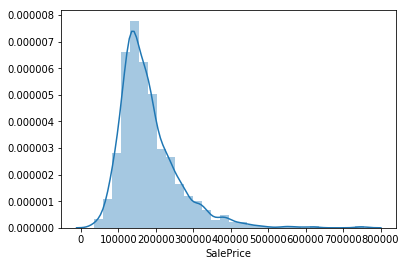

In [32]:
sns.distplot(data['SalePrice'], bins=30)
plt.show()

We can see the target variable is slightly skewed but some what normally distributed (skewness might be baecuse of outliers also)

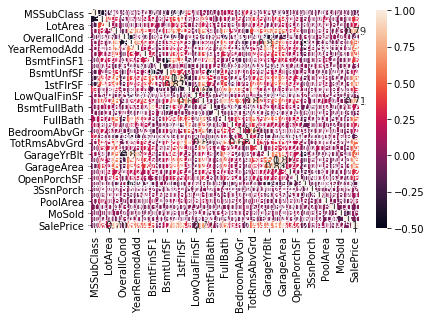

In [33]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

cant actually figure out the information because of to many variables,so we will take the 5 highly correlated fileds and see the relation

In [34]:
#Establishing the relation of strong correlation fields with target variable
k = 5 #number of variables for heatmap
cols = correlation_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [35]:
data[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']].corr()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000


We can see the correlation of OverallQual and  GrLivArea is higher than other variables with the target variable

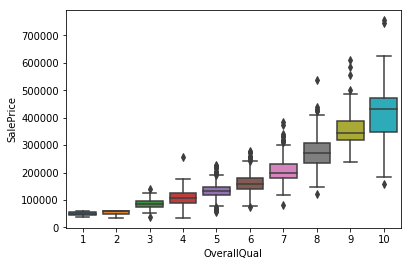

In [36]:
fig = sns.boxplot(x=data['OverallQual'], y=data["SalePrice"],)

As observed above OverallQual is highley correlated with sales price





In [37]:
#dropping the columns with more missing values
cols_with_missing = [col for col in data.columns 
                                 if data[col].isnull().sum()>100]
data = data.drop(cols_with_missing, axis=1)
data.shape

(1460, 74)

In [0]:
#Replacing the missing values of columns with mode value
for col in data.columns:
  if data[col].isnull().any():
    data[col].fillna(data[col].mode()[0],inplace=True)


In [39]:
#to check there is no more null fields in any column
data.isnull().any()

MSSubClass       False
MSZoning         False
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
                 ...  
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
GarageType       False
GarageYrBlt      False
GarageFinis

In [40]:
#checking the categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))


There are 38 categorical variables


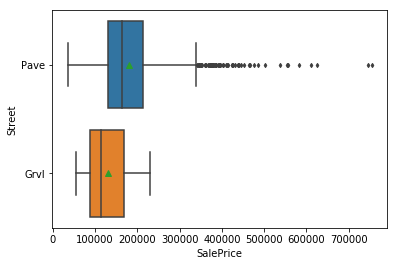

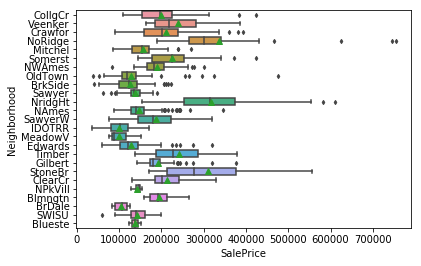

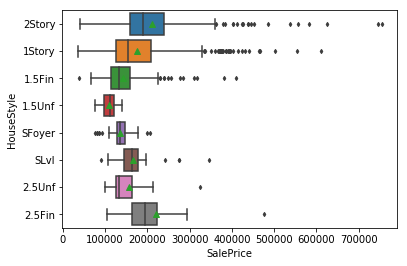

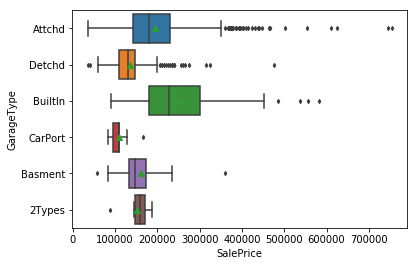

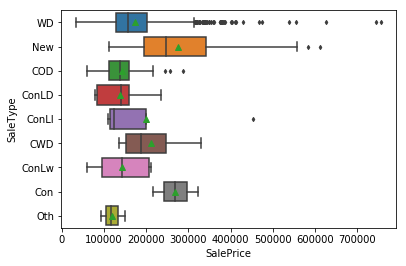

In [41]:
#Analysing categorical variables
sns.boxplot(y = 'Street', x = 'SalePrice', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3)
plt.show()
sns.boxplot(y = 'Neighborhood', x = 'SalePrice', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3)
plt.show()
sns.boxplot(y = 'HouseStyle', x = 'SalePrice', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3)
plt.show()
sns.boxplot(y = 'GarageType', x = 'SalePrice', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3)
plt.show()
sns.boxplot(y = 'SaleType', x = 'SalePrice', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3)
plt.show()

In [0]:
#divinding the data into X and Y
df_train=data
X=df_train.drop('SalePrice',axis=1)
X.head()
y=data['SalePrice']


In [43]:
# encoding the categorical data  
categorical_features = []
is_categorical = X.dtypes == 'object'
for col in X.columns.tolist():
    if is_categorical[col]: 
      categorical_features.append(col)
print(categorical_features)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[categorical_features] = X[categorical_features].apply(lambda col: le.fit_transform(col))
X[categorical_features].head(10)
#Facing error here( “TypeError: ‘>’ not supported between instances of ‘str’ and ‘float')
'''
ohe = OneHotEncoder(sparse = False)
columns = [feature + '_' + str(class_) for class_ in le.classes_]
Xdummies = pd.DataFrame(ohe.fit_transform(X[feature].values.reshape(-1,1))[:, 1:] ,
                            columns = columns[1:])
X.drop(feature, axis=1)
X= pd.concat([X, X_dummies], axis = 1)
'''







['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


"\nohe = OneHotEncoder(sparse = False)\ncolumns = [feature + '_' + str(class_) for class_ in le.classes_]\nXdummies = pd.DataFrame(ohe.fit_transform(X[feature].values.reshape(-1,1))[:, 1:] ,\n                            columns = columns[1:])\nX.drop(feature, axis=1)\nX= pd.concat([X, X_dummies], axis = 1)\n"

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
#divinding data in train and test
from sklearn.model_selection import train_test_split
def Split(X,y):
  return train_test_split(X,y,test_size=0.20,random_state=1)
X_train,X_test,y_train,y_test=Split(X,y)
print('the train and test data')
print('The X_train data is:',X_train.shape)
print('The X_test data is:',X_test.shape)
print('The Y_train data is:',y_train.shape)
print('The Y_test data is:',y_test.shape)


the train and test data
The X_train data is: (1168, 73)
The X_test data is: (292, 73)
The Y_train data is: (1168,)
The Y_test data is: (292,)


In [46]:
# checking the accuracy of the model with out the paremeters
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

82.86645735180824 %


Please help me with this ,why is my RMSE so high ,is it because I used all the categorical fileds as ordinal ones?
Actually I am facing one error why performing encoding and creating dummies.

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linreg=LinearRegression()
linreg.fit(X_train,y_train)
linreg.score(X_test,y_test)


0.8286645735180824

In [48]:
#using grid search to find the best score
from sklearn.model_selection import GridSearchCV
linreg1=LinearRegression()
parameters = {'normalize':[True,False], 'copy_X':[True, False]}
linreg = GridSearchCV(linreg1,parameters, cv = 10,refit = True)
linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
Y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set
RMSE_test = (metrics.mean_squared_error(y_test, Y_pred_test))                          # compute the RMSE of our predictions
print('RMSE for the test set is {}'.format(RMSE_test))


Mean cross-validated score of the best_estimator :  -2.6290273535868433e+23
RMSE for the test set is 1221954560.0617812


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
y_pred_train = linreg.predict(X_train)  
y_pred_test = linreg.predict(X_test)  
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [50]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 30749.04281527991
RMSE for test set is 34956.46664154976


In [51]:
# calculating the R2 and Adjusted R2 for training data
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8448013648677248 0.834445331627637


In [52]:
# calculating the R2 and Adjusted R2 for testing data
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8286645735180822 0.7712907839163391
